Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn, Warning and required Libraries

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
''' 
- train_test_split: Splits your data into training and testing parts.
- cross_val_score: Evaluates model performance using cross-validation.
- GridSearchCV: Searches for best hyperparameters using grid search and cross-validation.

'''
from sklearn.preprocessing import StandardScaler        #-- Normalizes data to have mean = 0 and standard deviation = 1.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
'''
- MAE: Average absolute difference.
- MSE: Mean squared error.
- R²: Score measuring how well predictions match actual values.

'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso
''' 
- LinearRegression: Fits a straight line to predict values.
- Ridge: Adds L2 penalty to reduce model complexity.
- Lasso: Adds L1 penalty for feature selection.

'''
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
''' 
- RandomForestRegressor: Many decision trees averaged together.
- GradientBoostingRegressor: Trees built one after another to improve performance.
- VotingRegressor: Combines multiple models by averaging their predictions.

'''
from xgboost import XGBRegressor
''' 
- High-performance gradient boosting framework optimized for speed and accuracy.

'''
import warnings
warnings.filterwarnings('ignore')

#-- - Suppresses warnings (useful for keeping notebook output clean).



In [19]:
df = pd.read_csv("StudentsPerformance_3_lyst1729690388778.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype

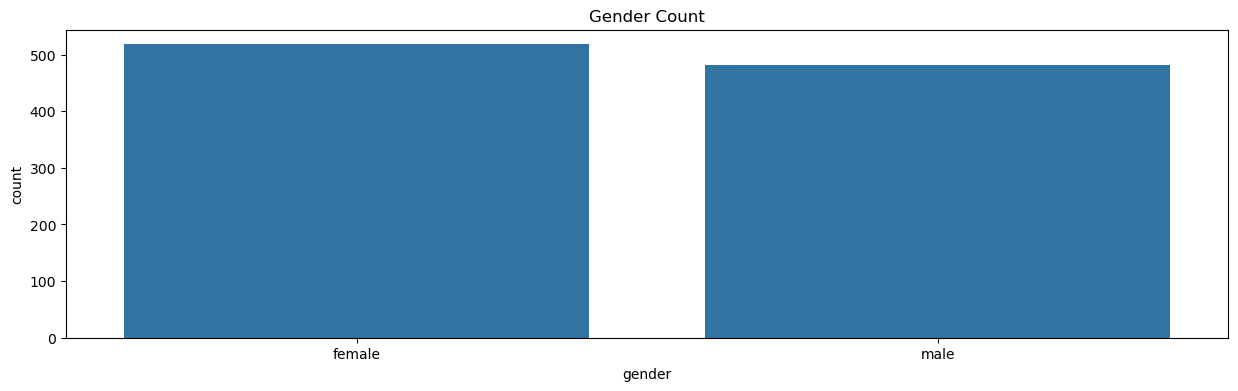

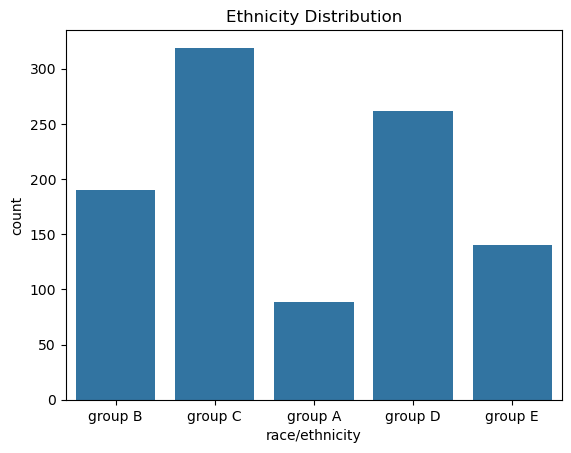

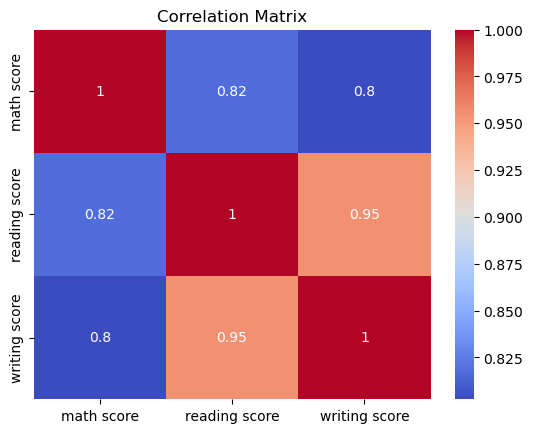

" \n- numeric_only=True: Ignores non-numeric columns.\n- annot=True: Shows actual correlation values.\n- cmap='coolwarm': Color scheme for the heatmap.\n\n"

In [20]:
#EDA

print(df.info())        #-- prints column names, types, and non-null counts.
print(df.isnull().sum())        #-- checks for missing data.
print(df.describe())            #-- gives summary statistics of numerical columns.

# Countplots for categorical features
plt.figure(figsize=(15, 4))     #-- sets plot size.
sns.countplot(x='gender', data=df)      #-- sns.countplot() shows frequency of each category in 'gender'.

plt.title("Gender Count")
plt.show()

sns.countplot(x='race/ethnicity', data=df)
plt.title("Ethnicity Distribution")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

''' 
- numeric_only=True: Ignores non-numeric columns.
- annot=True: Shows actual correlation values.
- cmap='coolwarm': Color scheme for the heatmap.

'''


In [21]:
#-- Feature Engineering
#-- Create new interaction feature between reading score and writing score:

df['reading_writing_avg'] = (df['reading score'] + df['writing score']) / 2


In [22]:
#-- Encode Categorical Features

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

""" 
- Converts categorical features (like gender and ethnicity) to binary columns.
- drop_first=True: Avoids dummy variable trap by dropping the first category

"""


' \n- Converts categorical features (like gender and ethnicity) to binary columns.\n- drop_first=True: Avoids dummy variable trap by dropping the first category\n\n'

In [23]:
#-- Define Features and Target

X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

''' 
- X: Contains all features except the math score.
- y: Contains the math score, which is your prediction target.
- axis=1: Specifies you’re dropping a column not a row

'''


' \n- X: Contains all features except the math score.\n- y: Contains the math score, which is your prediction target.\n- axis=1: Specifies you’re dropping a column not a row\n\n'

In [24]:
#-- Train-Test Split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
'''
- Splits data into training (75%) and testing (25%) sets.
- random_state=42 ensures results are reproducible.
- test_size=0.25: 25% of data is reserved for testing.

'''


'\n- Splits data into training (75%) and testing (25%) sets.\n- random_state=42 ensures results are reproducible.\n- test_size=0.25: 25% of data is reserved for testing.\n\n'

In [25]:
#-- Feature Scaling

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
'''
- Scales numeric features to have mean 0 and standard deviation 1.
- This is especially helpful for algorithms like Linear Regression, Ridge, and Lasso.

'''

'\n- Scales numeric features to have mean 0 and standard deviation 1.\n- This is especially helpful for algorithms like Linear Regression, Ridge, and Lasso.\n\n'

In [26]:
#-- Train Multiple Models and Compare

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}
'''
- Prepares six regression models.
- We can easily loop over them to train and compare performance.

'''
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append((name, r2, mae, mse, rmse))

    '''
    - Trains each model on training data.
    - Makes predictions on test data.
    - Calculates evaluation metrics:
    - R² Score: Measures how well predictions match actual scores (higher is better).
    - MAE: Average absolute errors.
    - MSE: Average of squared errors.
    - RMSE: Square root of MSE (on the same scale as math scores).

    '''

# Display results
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE'])
results_df.sort_values(by='R2 Score', ascending=False)

''' 
- Converts results to a DataFrame for easy viewing.
- Sorts models from best to worst based on R² Score.

'''


' \n- Converts results to a DataFrame for easy viewing.\n- Sorts models from best to worst based on R² Score.\n\n'

In [27]:
#-- Best Model Tuning — Random Forest

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

'''
- param_grid: Specifies parameters to try.
- GridSearchCV: Performs a search over combinations using 5-fold cross-validation.
- scoring='r2': Uses R² as the performance metric.
- best_model = grid_search.best_estimator_: Returns the best performing model.

'''

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


"\n- param_grid: Specifies parameters to try.\n- GridSearchCV: Performs a search over combinations using 5-fold cross-validation.\n- scoring='r2': Uses R² as the performance metric.\n- best_model = grid_search.best_estimator_: Returns the best performing model.\n\n"

In [28]:
#-- Final Model Evaluation

final_pred = best_model.predict(x_test)

print("R2 Score:", r2_score(y_test, final_pred))
print("MAE:", mean_absolute_error(y_test, final_pred))
print("MSE:", mean_squared_error(y_test, final_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_pred)))

'''
- Uses the tuned model to make predictions on the test set.
- Re-evaluates performance with all metrics.

'''


R2 Score: 0.8443954072754408
MAE: 4.828156327117327
MSE: 38.28241701667075
RMSE: 6.1872786438522995


'\n- Uses the tuned model to make predictions on the test set.\n- Re-evaluates performance with all metrics.\n\n'

In [29]:
import joblib
joblib.dump(best_model, "student_performance_model.pkl")

'''
- Saves our trained model as a .pkl file.
- We can load and use it later without retraining.

'''

'\n- Saves our trained model as a .pkl file.\n- We can load and use it later without retraining.\n\n'

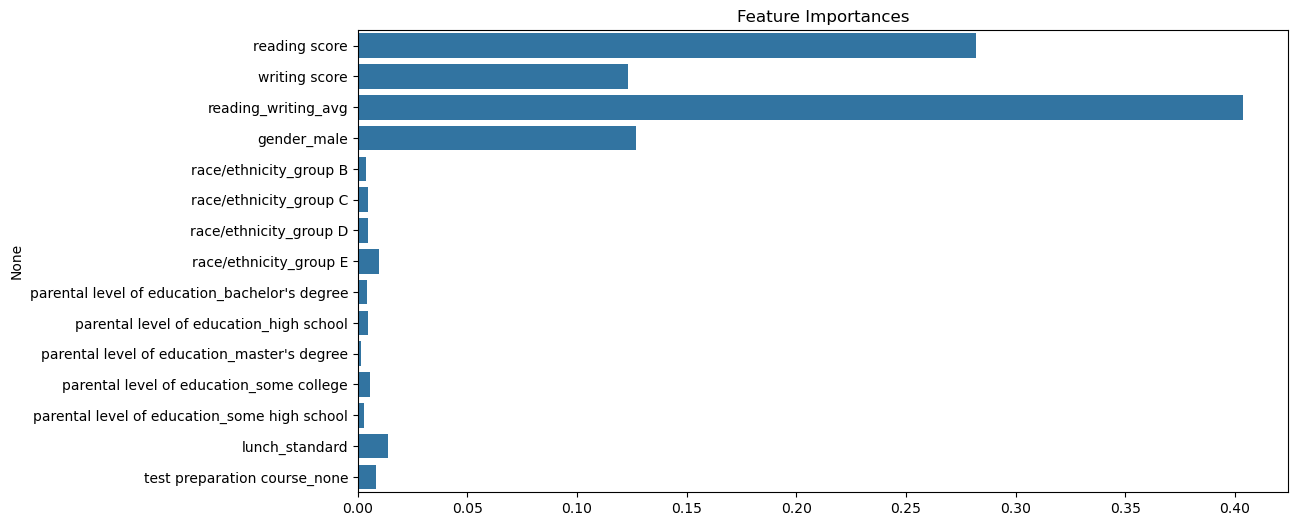

In [30]:
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()

#- feature_importances_: Shows how much each feature contributed to predictions.
